# Fashion MNIST

There is a nice alternative to the MNIST dataset, the Fashion MNIST dataset. It includes items like shirts, dresses, and shoes as will be shown below.

## Loading Fashion MNIST

Go ahead and load the fashion dataset by running the following cell. Note that "np" is given in the labels indicating that the default keras types are numpy arrays.

In [ ]:
# 1. Run the following cell to load the data.
from tensorflow.keras.datasets import fashion_mnist
((X_train_np, y_train_np), (X_test_np, y_test_np)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Reshape Data

To get the data into the same shape as our first MNIST notebook, we need to reshape the data. First check the shape, the reshape it.

In [ ]:
# 2. Check shape of X_train_np
X_train_np.shape

(60000, 28, 28)

In [ ]:
# 3. Reshape X_train_np from 3D to 2D using the method .reshape(60000, 28*28) on X_train_np
X_train_np = X_train_np.reshape(60000, 28*28)

In [ ]:
# 4. Convert to a pandas DataFrame X_train using pd.DataFrame with X_train_np as input
import pandas as pd

X_train = pd.DataFrame(X_train_np)

In [ ]:
# 5. Limit X_train to the first 2000 rows (hint you may use .iloc[:2000] on X_train)
# X_train = X_train.iloc[:2000]

In [ ]:
# 6. Show the first 5 rows of the DataFrame X_train
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


## Graph and Label Fashion Data

In [ ]:
# 7. Convert y_train to dataFrame and check y_train.value_counts()
y_train = pd.DataFrame(y_train_np)
# y_train = y_train.iloc[:2000]
y_train.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
# 8. We need the class names of the y values. Run the this cell to load them.
class_names = ['tshirt/top', 'trouser', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']


In [ ]:
# 9. Write code to generate a random integer of y, and print the class name and y value  
# Hint y_train_np may be helpful.
import numpy as np
randomIndex = np.random.randint(0, y_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]
print(randomIndex)
print(randomrow)
print(class_names[randomrow[0]])

53378
0    9
Name: 53378, dtype: uint8
ankle_boot


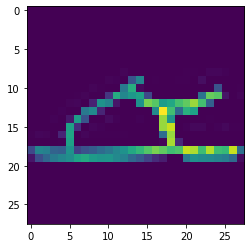

sandal


In [ ]:
# 10. Graph a random image and Fashion MNIST classification.
type(randomrow)

randomrow.shape

randomrow

randomIndex = np.random.randint(0, X_train.shape[0])
randomrow = y_train.iloc[randomIndex, :]

randomPixels = X_train.iloc[randomIndex, :]


npRandomRow = np.array(randomPixels)

randomImage = npRandomRow.reshape(28, 28)

import matplotlib.pyplot as plt
plt.imshow(randomImage)

plt.show()

print(class_names[randomrow[0]])

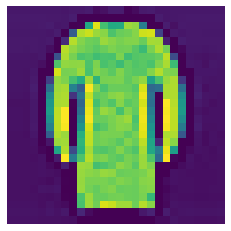

dress


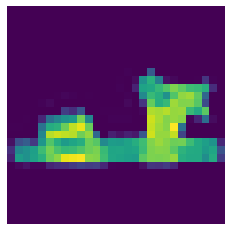

sandal


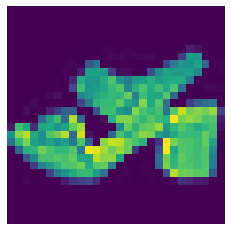

sandal


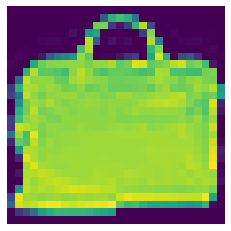

bag


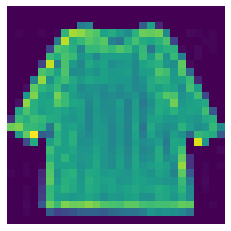

dress


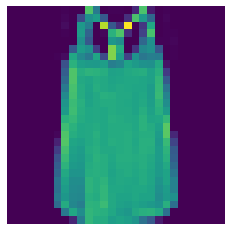

tshirt/top


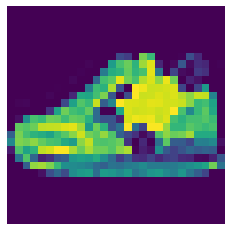

sneaker


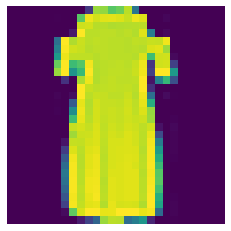

dress


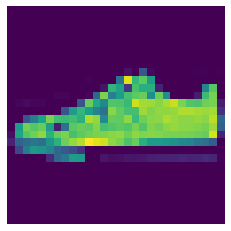

sneaker


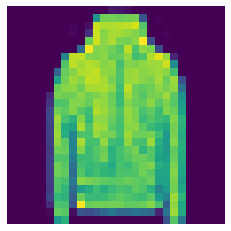

coat


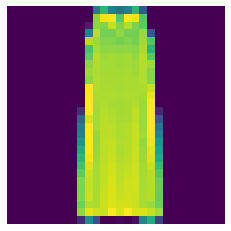

dress


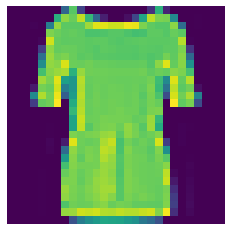

tshirt/top


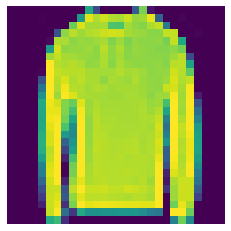

pullover


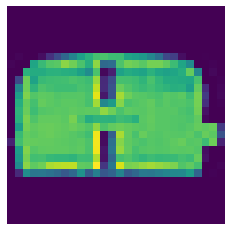

bag


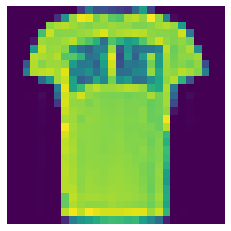

tshirt/top


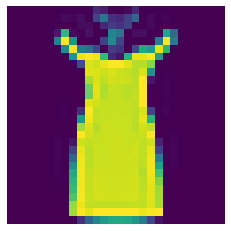

dress


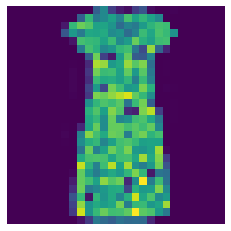

dress


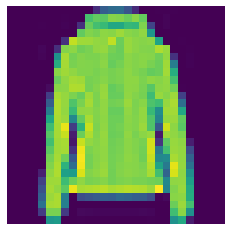

coat


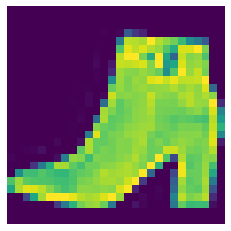

ankle_boot


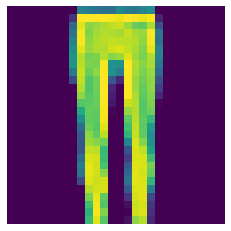

trouser


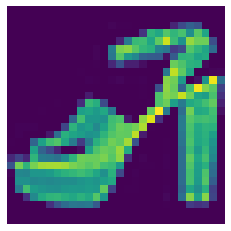

sandal


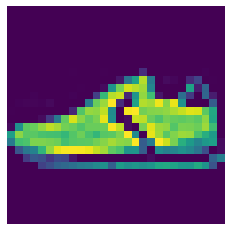

sneaker


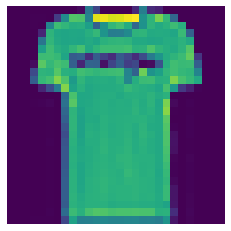

tshirt/top


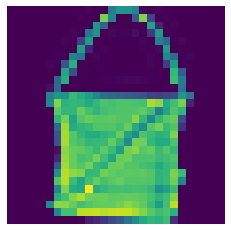

bag


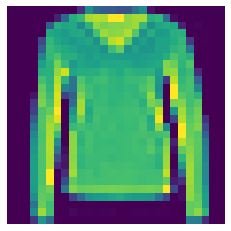

pullover


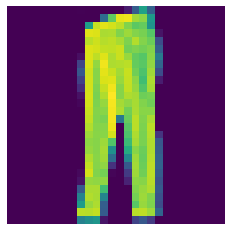

trouser


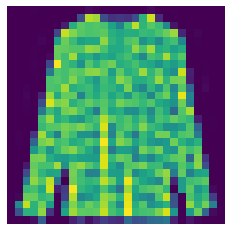

shirt


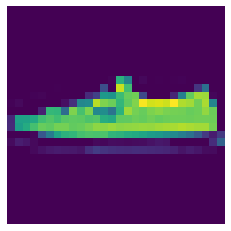

sneaker


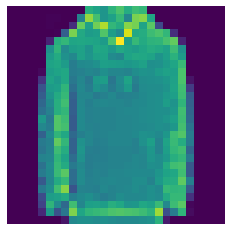

pullover


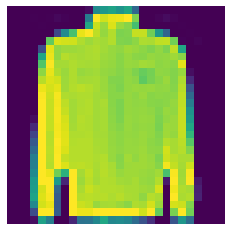

coat


In [ ]:
# 11. Research options to graph multiple images and their classifications at once. 
def im_print():
  randomIndex = np.random.randint(0, X_train.shape[0])
  randomrow = y_train.iloc[randomIndex, :]
# Get the row of the random index
  randomPixels = X_train.iloc[randomIndex, :]


  npRandomRow = np.array(randomPixels)

  randomImage = npRandomRow.reshape(28, 28)

  plt.imshow(randomImage)
  plt.axis("off")
  plt.show()

  print(class_names[randomrow[0]])

for i in range(30):
  im_print()
# Share with your cohort.

## Machine Learning

Score machine learning models with the Fashion MNIST Data using the strategies learned in lecture.

In [ ]:
y_test = pd.DataFrame(y_test_np)
X_test_np = X_test_np.reshape(10000, 28*28)
X_test = pd.DataFrame(X_test_np)

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
def classifier(model):
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  testScore = model.score(X_test, y_test)
  print(f"Training:{train_score}")
  print(f"Test:{testScore}")

In [ ]:
classifier(RandomForestClassifier())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: ignored

In [ ]:
classifier(LogisticRegression())

In [ ]:
#Hot Encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


X_test = X_test

In [ ]:
#Keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm

num_cols = X_train.shape[1]

model = Sequential()

model.add(Dense(60, input_shape=(num_cols,), activation='relu'))

model.add(Dense(50, input_shape=(num_cols,), activation='relu'))
model.add(Dense(40, input_shape=(num_cols,), activation='relu'))

model.add(Dense(30, input_shape=(num_cols,), activation='relu'))
model.add(Dropout(.2))
model.add(Dense(20, input_shape=(num_cols,), activation='relu', kernel_constraint=maxnorm(1)))
model.add(Dropout(.2))



model.add(Dense(10, activation='softmax'))

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                47100     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping_monitor = EarlyStopping(patience=30)

model.fit(X_train, y_train, epochs=2000, validation_split=0.1, callbacks=[early_stopping_monitor])
model.evaluate(X_test, y_test)

Epoch 1/2000
1688/1688 [==============================] - 21s 3ms/step - loss: 2.5552 - accuracy: 0.4205 - val_loss: 0.7117 - val_accuracy: 0.7347
Epoch 2/2000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7538 - accuracy: 0.7100 - val_loss: 0.5943 - val_accuracy: 0.7718
Epoch 3/2000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.6299 - accuracy: 0.7674 - val_loss: 0.4972 - val_accuracy: 0.8255
Epoch 4/2000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5642 - accuracy: 0.8002 - val_loss: 0.5349 - val_accuracy: 0.8150
Epoch 5/2000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5432 - accuracy: 0.8078 - val_loss: 0.4819 - val_accuracy: 0.8362
Epoch 6/2000
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5001 - accuracy: 0.8247 - val_loss: 0.4714 - val_accuracy: 0.8413
Epoch 7/2000
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4808 - accuracy: 0.8327 - val_loss: 0.4137 

[0.4805505871772766, 0.8687000274658203]

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


nnet = MLPClassifier(hidden_layer_sizes=(600,500,400,300, 200), max_iter= 200000)
nnet.fit(X_train, y_train)

predictions = nnet.predict(X_test)

print("MLP Testing Set Score: ")
print(accuracy_score(y_test, predictions)*100)

In [ ]:
def CNNClassifier(num_epochs=50, layers=5, dropout=0.5):
  def create_model():
    model = Sequential()
    model.add(Dense(30, input_shape=(num_cols,), activation='relu'))
    
    
    for i in range(layers):
     model.add(Dense(30, input_shape=(num_cols,), activation='relu'))

    model.add(Dropout(dropout))
    model.add(Dense(10, activation='softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

In [ ]:
cnn = CNNClassifier(num_epochs=50,layers=10,dropout=.5)

cnn.fit(X_train,y_train)
# Print the score on the testing data
predictions = cnn.predict(X_test)
print(predictions)
print(y_test)
print(accuracy_score(y_test, predictions)*100)

In [ ]:
from keras.layers.normalization import BatchNormalization

num_cols = X_train.shape[1]

model = Sequential()

model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, input_shape=(num_cols,),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, input_shape=(num_cols,),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, input_shape=(num_cols,), activation='softmax'))